In [ ]:
from google.colab import files
files.upload()  


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dprasannavenkatesh","key":"09a552d9b412718c3ecdece5322d84b4"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install -q kaggle


In [4]:
!kaggle datasets download abenjelloun/breast-mri-tumor-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/abenjelloun/breast-mri-tumor-classification-dataset
License(s): MIT
 88% 360M/411M [00:00<00:00, 499MB/s]
100% 411M/411M [00:00<00:00, 516MB/s]


In [5]:
!unzip breast-mri-tumor-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_3865.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_3881.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4192.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4272.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_439.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4445.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4478.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4523.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4598.jpg  
  inflating: breast_mri_dataset_original_shape/train/Malignant/BREASTDX-01-0065_4613.jpg  
  inflating: breast_mri_dataset_original

In [ ]:


!pip install tensorflow matplotlib

import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image

In [7]:
extract_dir = "/content/breast_mri_dataset"

In [ ]:

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(extract_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale"
)

val_gen = val_datagen.flow_from_directory(
    os.path.join(extract_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale"
)

test_gen = test_datagen.flow_from_directory(
    os.path.join(extract_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    color_mode="grayscale"
)

class_labels = list(train_gen.class_indices.keys())
print("Classes:", class_labels)

Found 16826 images belonging to 2 classes.
Found 3594 images belonging to 2 classes.
Found 3604 images belonging to 2 classes.
Classes: ['Benign', 'Malignant']


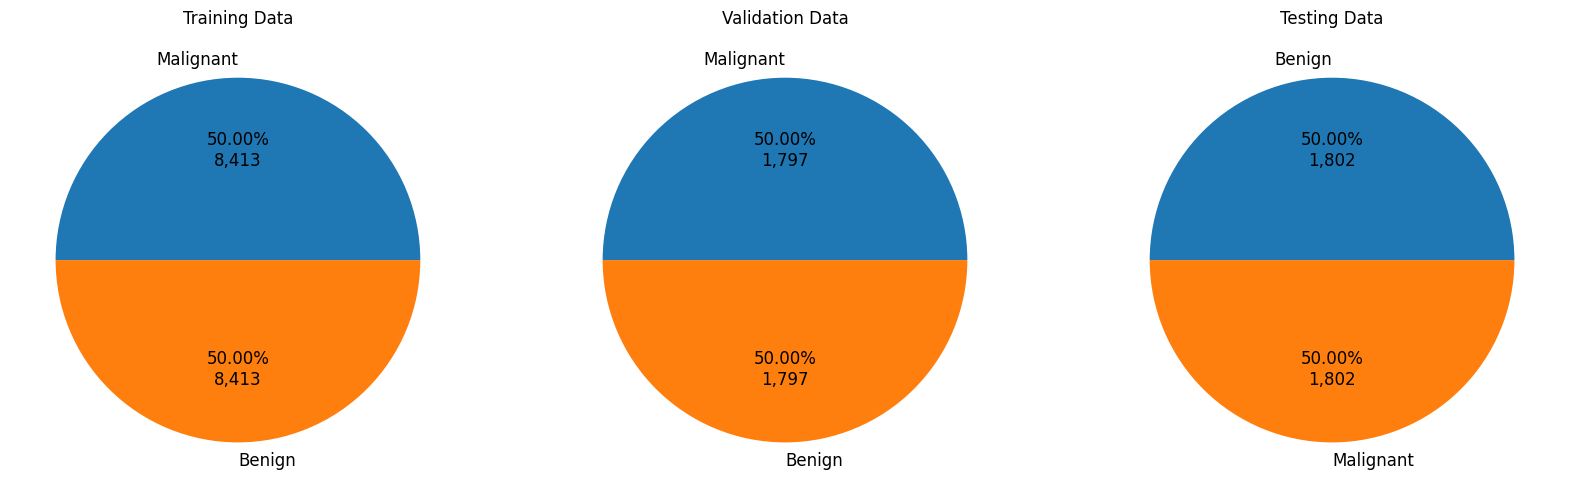

In [ ]:

def get_class_counts(generator):
    class_counts = {}
    for i in range(len(generator)):
        _, labels = generator[i]
        for label_one_hot in labels:
            label = class_labels[np.argmax(label_one_hot)]
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += 1
    return class_counts

train_counts = get_class_counts(train_gen)
val_counts = get_class_counts(val_gen)
test_counts = get_class_counts(test_gen)

fig, ax = plt.subplots(ncols=3, figsize=(20, 7))


ax[0].set_title('Training Data')
ax[0].pie(
    train_counts.values(),
    labels=train_counts.keys(),
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(train_counts.values()) / 100),
    textprops={'fontsize': 12}
)


ax[1].set_title('Validation Data')
ax[1].pie(
    val_counts.values(),
    labels=val_counts.keys(),
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(val_counts.values()) / 100),
    textprops={'fontsize': 12}
)


ax[2].set_title('Testing Data')
ax[2].pie(
    test_counts.values(),
    labels=test_counts.keys(),
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(test_counts.values()) / 100),
    textprops={'fontsize': 12}
)

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                     GlobalAveragePooling2D, Dense, Dropout)
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 99s 167ms/step - accuracy: 0.5786 - loss: 0.6857 - val_accuracy: 0.5022 - val_loss: 0.9122
Epoch 2/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.6774 - loss: 0.5885 - val_accuracy: 0.5220 - val_loss: 1.1200
Epoch 3/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 79s 150ms/step - accuracy: 0.7324 - loss: 0.5290 - val_accuracy: 0.5963 - val_loss: 0.7854
Epoch 4/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.7706 - loss: 0.4700 - val_accuracy: 0.7206 - val_loss: 0.5662
Epoch 5/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 79s 150ms/step - accuracy: 0.7935 - loss: 0.4256 - val_accuracy: 0.8347 - val_loss: 0.3713
Epoch 6/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 79s 151ms/step - accuracy: 0.8142 - loss: 0.3945 - val_accuracy: 0.6864 - val_loss: 0.6563
Epoch 7/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.8388 - loss: 0.3535 - val_accuracy: 0.8269 - val_loss: 0.3711
Epoch 8/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 79s 150ms/step - accuracy: 0.8614 - loss: 0

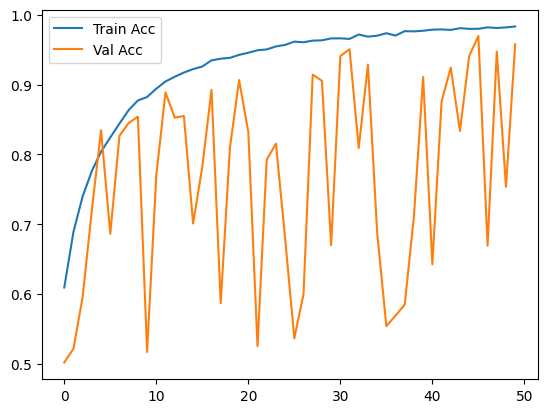

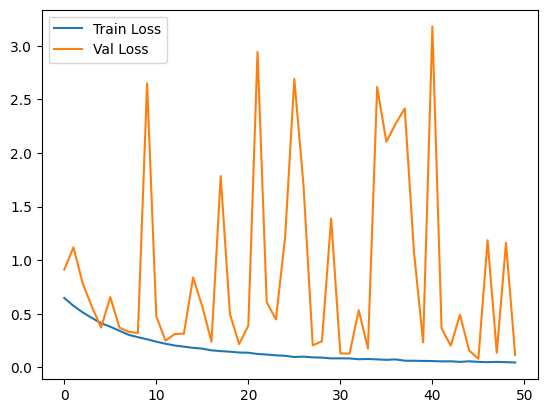

In [ ]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [ ]:

test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.2f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9500 - loss: 0.1341
Test Accuracy: 0.96


In [ ]:

model.save("breast_mri_model.keras")

In [ ]:


uploaded = files.upload()

for fn in uploaded.keys():
   
    path = '/content/' + fn
    img = image.load_img(path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]
    print(f"Predicted class: {predicted_class_label}")